In [ ]:
! pip install transformers
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=65fc436c31c99c1fb2de429ed04b6cea11343ba899f08221561cb836bc02a809
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
from google.colab import files
print("upload raw q data")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

upload raw q data


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')

In [ ]:


query_embedding = model.encode("How big is London")
passage_embedding = model.encode("assistant:Whether it's legal to download YouTube videos in the United States depends on the specific circumstances and the purpose of the download.\n\nAccording to the copyright law in the US, it is generally illegal to download or distribute copyrighted content without the permission of the copyright owner. YouTube videos are often protected by copyright, and downloading them without the permission of the copyright owner would likely be a violation of copyright law.\n\nHowever, there are some limited exceptions to this, such as fair use, which allows for limited use of copyrighted material for purposes such as criticism, comment, news reporting, teaching, scholarship, or research. Whether a particular use of a YouTube video would be considered fair use would depend on the specific circumstances and the purpose of the use.\n\nIn general, it's a good idea to respect the copyright of others and to only download YouTube videos if you have the permission of the copyright owner or if your use falls within one of the limited exceptions provided by law.")
print(query_embedding.shape,query_embedding.tolist())
print(passage_embedding.shape)

(768,) [-0.2165602594614029, -0.1824609786272049, -0.2938069701194763, 0.4710267186164856, -0.06038106977939606, -0.14367057383060455, 0.24857161939144135, 0.11347242444753647, 0.2258804887533188, 0.14144787192344666, -0.08640731126070023, -0.3690106272697449, -0.10170578211545944, -0.04223543778061867, 0.1977066844701767, -0.08139047771692276, -0.12072901427745819, -0.03104044310748577, -0.6332141160964966, -0.13856223225593567, -0.06437334418296814, -0.08043678104877472, -0.15245665609836578, -0.1327645480632782, 0.14666084945201874, 0.08446977287530899, -0.17767304182052612, 0.09551284462213516, -0.1631598323583603, 0.11800305545330048, -0.30926311016082764, -0.3994421660900116, -0.019088398665189743, 0.23719386756420135, -0.00011291511327726766, 0.20836582779884338, 0.2196802943944931, -0.14203572273254395, 0.505378782749176, 0.19117888808250427, 0.0827905684709549, 0.026194455102086067, -0.18950821459293365, 0.13572849333286285, 0.11377410590648651, -0.1367979347705841, -0.1953754

In [ ]:
#create new file with embeddings and download it
#load data
import json
from tqdm import tqdm
q_file = "./Qdata.json"
f = open(q_file)
rawqfile  = json.load(f)
embed_q_file = rawqfile.copy()

for i in tqdm(range(len(rawqfile))):
  embed_q_file[i]["state_embd"] =  model.encode(rawqfile[i]["state"]).tolist()

  embed_q_file[i]["state_action_cat_embd"] =  model.encode(rawqfile[i]["state"]).tolist() + model.encode(rawqfile[i]["action"]).tolist()

  embed_q_file[i]["state_action_embd"] = model.encode(rawqfile[i]["state"] + rawqfile[i]["action"]).tolist()

  embed_q_file[i]["next_state_embd"] = model.encode(rawqfile[i]["n_state"]).tolist()


print(json.dumps(embed_q_file[:3], indent = 1))

with open('Q_emd_data.json', 'w') as fout:
    json.dump(embed_q_file, fout)


files.download('Q_emd_data.json')







100%|██████████| 32618/32618 [58:03<00:00,  9.36it/s]


[
 {
  "state": "prompter:Is it legal to download YouTube videos in the US?",
  "action": " assistant:Whether it's legal to download YouTube videos in the United States depends on the specific circumstances and the purpose of the download.\n\nAccording to the copyright law in the US, it is generally illegal to download or distribute copyrighted content without the permission of the copyright owner. YouTube videos are often protected by copyright, and downloading them without the permission of the copyright owner would likely be a violation of copyright law.\n\nHowever, there are some limited exceptions to this, such as fair use, which allows for limited use of copyrighted material for purposes such as criticism, comment, news reporting, teaching, scholarship, or research. Whether a particular use of a YouTube video would be considered fair use would depend on the specific circumstances and the purpose of the use.\n\nIn general, it's a good idea to respect the copyright of others and to

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(json.dumps(embed_q_file[0], indent = 1))

100%|██████████| 64/64 [00:25<00:00,  2.48it/s]


epoch :  0 losses q1,q2,v :  0.053770214 0.058335707 0.00053557643


100%|██████████| 64/64 [00:22<00:00,  2.91it/s]


epoch :  1 losses q1,q2,v :  0.0010708242 0.0011898226 5.7400495e-05


100%|██████████| 64/64 [00:20<00:00,  3.14it/s]


epoch :  2 losses q1,q2,v :  0.0007066432 0.00076304004 5.2275078e-05


100%|██████████| 64/64 [00:23<00:00,  2.74it/s]


epoch :  3 losses q1,q2,v :  0.0007477279 0.00077209907 4.5877998e-05


100%|██████████| 64/64 [00:20<00:00,  3.12it/s]


epoch :  4 losses q1,q2,v :  0.0008934324 0.00089104846 4.084251e-05


100%|██████████| 64/64 [00:22<00:00,  2.84it/s]


epoch :  5 losses q1,q2,v :  0.0010925708 0.001102086 3.9093615e-05


100%|██████████| 64/64 [00:21<00:00,  2.96it/s]


epoch :  6 losses q1,q2,v :  0.0013355457 0.001350753 3.8812756e-05


100%|██████████| 64/64 [00:21<00:00,  2.95it/s]


epoch :  7 losses q1,q2,v :  0.0018359123 0.0018249976 6.208896e-05


100%|██████████| 64/64 [00:22<00:00,  2.91it/s]


epoch :  8 losses q1,q2,v :  0.0019022034 0.0018819906 4.0350664e-05


100%|██████████| 64/64 [00:21<00:00,  2.94it/s]


epoch :  9 losses q1,q2,v :  0.002308628 0.0022966436 5.3632044e-05


100%|██████████| 64/64 [00:21<00:00,  2.91it/s]


epoch :  10 losses q1,q2,v :  0.0025356596 0.0025367057 5.0418785e-05


100%|██████████| 64/64 [00:20<00:00,  3.09it/s]


epoch :  11 losses q1,q2,v :  0.00325928 0.003247973 7.597359e-05


100%|██████████| 64/64 [00:22<00:00,  2.84it/s]


epoch :  12 losses q1,q2,v :  0.003430257 0.0034266966 5.5738103e-05


100%|██████████| 64/64 [00:23<00:00,  2.77it/s]


epoch :  13 losses q1,q2,v :  0.0041632485 0.0041536875 8.158379e-05


100%|██████████| 64/64 [00:20<00:00,  3.18it/s]


epoch :  14 losses q1,q2,v :  0.004120337 0.004128512 5.3646294e-05


100%|██████████| 64/64 [00:21<00:00,  2.93it/s]


epoch :  15 losses q1,q2,v :  0.005095594 0.005066694 8.805063e-05


100%|██████████| 64/64 [00:21<00:00,  2.96it/s]


epoch :  16 losses q1,q2,v :  0.004901422 0.004904013 4.725824e-05


100%|██████████| 64/64 [00:21<00:00,  2.93it/s]


epoch :  17 losses q1,q2,v :  0.006531938 0.0064784926 0.000104481274


100%|██████████| 64/64 [00:20<00:00,  3.08it/s]


epoch :  18 losses q1,q2,v :  0.0059615015 0.0059401672 5.4915945e-05


100%|██████████| 64/64 [00:22<00:00,  2.80it/s]


epoch :  19 losses q1,q2,v :  0.0076064486 0.0075733373 0.00012018964
..saving at ./models/


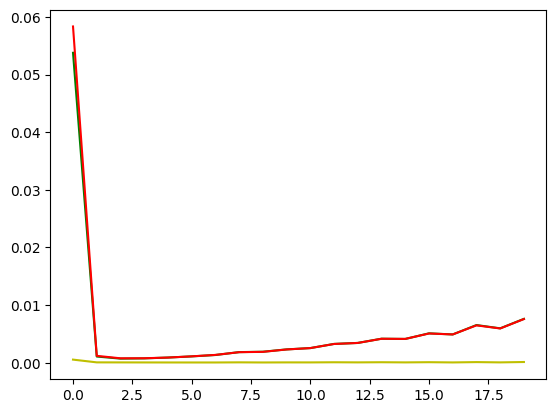

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import gym
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import json
from tqdm import tqdm
#load dataset

BATCH_SIZE = 512

class CustomQDataset(Dataset):
    def __init__(self, q_file):
      f = open(q_file)
      self.qfile  = json.load(f)
    def __len__(self):
        return len(self.qfile)
    def __getitem__(self, idx):
        element= self.qfile[idx]
        return torch.tensor(element['state_embd']), torch.tensor(element['state_action_cat_embd'])\
          ,torch.tensor(element['next_state_embd']),torch.tensor(element['reward']),torch.tensor(element['done'])#s,s+a,ns,r,d
dataset = CustomQDataset('Q_emd_data.json')
train_dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

def valueloss(gt,pred, expectile=0.8):
    diff = gt - pred #Q min target - v(s)
    weight = torch.where(diff > 0, expectile, (1 - expectile))
    loss = weight * (diff**2)
    return loss.mean()
#dqn net
class DeepQNetwork(nn.Module):
  """Q(s,a) ->
    input is embedding of state+action
  """
  def __init__(self,lr,input_dims,fc1_dims,fc2_dims,n_actions):
    super(DeepQNetwork,self).__init__()
    self.input_dims = input_dims
    self.fc1_dims = fc1_dims
    self.fc2_dims = fc2_dims
    self.n_actions = n_actions
    #layers
    self.fc1 = nn.Linear(self.input_dims,self.fc1_dims)
    self.fc2  = nn.Linear(self.fc1_dims,self.fc2_dims)
    self.fc3  = nn.Linear(self.fc2_dims,1)
    #optimizer
    self.optimizer = optim.AdamW(self.parameters(),lr=lr,amsgrad=True)
    self.loss =  nn.MSELoss()#nn.SmoothL1Loss()#nn.MSELoss()
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.to(self.device)
  def forward(self,state_action):
    x = F.relu(self.fc1(state_action))
    x = F.relu(self.fc2(x))
    Qactions = self.fc3(x)
    return Qactions
  def predict(self, state_action):
    with torch.no_grad():
      state_action = state_action.to(self.device)
      output=self.forward(state_action)
    return output
#V net
class DeepVNetwork(nn.Module):
  """V(s) ->v """
  def __init__(self,lr,input_dims,fc1_dims,fc2_dims,n_actions):
    super(DeepVNetwork,self).__init__()
    self.input_dims = input_dims
    self.fc1_dims = fc1_dims
    self.fc2_dims = fc2_dims
    self.n_actions = n_actions
    #layers
    self.fc1 = nn.Linear(self.input_dims,self.fc1_dims)
    self.fc2  = nn.Linear(self.fc1_dims,self.fc2_dims)
    self.fc3  = nn.Linear(self.fc2_dims,1)
    #optimizer
    self.optimizer = optim.AdamW(self.parameters(),lr=lr,amsgrad=True)
    self.loss = valueloss
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.to(self.device)
  def forward(self,state):
    x = F.relu(self.fc1(state))
    x = F.relu(self.fc2(x))
    Qactions = self.fc3(x)
    return Qactions
  def predict(self, state):
    with torch.no_grad():
      state = state.to(self.device)
      output=self.forward(state)
    return output



#agent
class IQLAgent():
  def __init__(self,gamma,lr,input_dims,n_actions,tau=0.001):
    self.gamma=gamma
    self.lr=lr
    self.n_actions = n_actions
    self.action_space = [i for i in range(n_actions)]
    self.input_dims = input_dims
    self.TAU = tau


    #q1 nets
    self.Q_primary1 =  DeepQNetwork(lr=self.lr,input_dims=2*self.input_dims,
                                   fc1_dims=256*10,fc2_dims=256*2,n_actions=self.n_actions)
    self.Q_target1 =  DeepQNetwork(lr=self.lr,input_dims=2*self.input_dims,
                                   fc1_dims=256*10,fc2_dims=256*2,n_actions=self.n_actions)
    self.Q_target1.load_state_dict(self.Q_primary1.state_dict())
    #q2 nets
    self.Q_primary2 =  DeepQNetwork(lr=self.lr,input_dims=2*self.input_dims,
                                   fc1_dims=256*10,fc2_dims=256*2,n_actions=self.n_actions)
    self.Q_target2 =  DeepQNetwork(lr=self.lr,input_dims=2*self.input_dims,
                                   fc1_dims=256*10,fc2_dims=256*2,n_actions=self.n_actions)
    self.Q_target2.load_state_dict(self.Q_primary2.state_dict())
    #value net
    self.Value =  DeepVNetwork(lr=self.lr,input_dims=self.input_dims,
                                   fc1_dims=256*10,fc2_dims=256*2,n_actions=self.n_actions)

  def learn(self,batch_s,batch_s_a,batch_ns,batch_r,batch_done):

    state_batch = batch_s.to(self.Q_primary1.device)
    new_state_batch = batch_ns.to(self.Q_primary1.device)
    reward_batch = batch_r.to(self.Q_primary1.device)
    terminal_batch = batch_done.to(self.Q_primary1.device)
    state_action_batch = batch_s_a.to(self.Q_primary1.device)

    q_sa1 = self.Q_primary1(state_action_batch) #q1(s,a)
    q_sa2 = self.Q_primary2(state_action_batch) #q2(s,a)
    v_s = self.Value(state_batch)#v(s)
    with torch.no_grad():
      q_sa1target = self.Q_target1(state_action_batch)#(q1tar(s,a))
      q_sa2target = self.Q_target2(state_action_batch)#(q2tar(s,a))
      Q_satarget = torch.minimum(q_sa1target,q_sa2target).detach()#value target for v(s)
      v_s_ = self.Value(new_state_batch)#v(s_)
      v_s_[terminal_batch] = 0.0 #done = true | computing target for q_sa1 , q_sa2

    q_groundtruth =   reward_batch.unsqueeze(1) + self.gamma*v_s_ #q(s,a) = r + (1-done)*gamma*max(Q(s_,a_)) | max(Q(s_,a_))=> v(s_)
     # Compute Q losses
    qloss1 = self.Q_primary1.loss(q_sa1, q_groundtruth)
    qloss2 = self.Q_primary2.loss(q_sa2, q_groundtruth)
     # Optimize the Value function
    v_loss = self.Value.loss(Q_satarget,v_s)
    self.Value.optimizer.zero_grad()
    v_loss.backward()
    self.Value.optimizer.step()
    # optimize the Q function
    self.Q_primary1.optimizer.zero_grad()
    self.Q_primary2.optimizer.zero_grad()
    qloss1.backward()
    # In-place gradient clipping q1
    torch.nn.utils.clip_grad_value_(self.Q_primary1.parameters(), 100)
    self.Q_primary1.optimizer.step()
    qloss2.backward()
    # In-place gradient clipping q2
    torch.nn.utils.clip_grad_value_(self.Q_primary2.parameters(), 100)
    self.Q_primary2.optimizer.step()



    # Soft update of the target network's weights
    # θ′ ← τ θ + (1 −τ )θ′
    #soft update target q1
    target_net_state_dict1 = self.Q_target1.state_dict()
    policy_net_state_dict1 = self.Q_primary1.state_dict()
    for key in policy_net_state_dict1:
        target_net_state_dict1[key] = policy_net_state_dict1[key]*self.TAU + target_net_state_dict1[key]*(1-self.TAU)
    self.Q_target1.load_state_dict(target_net_state_dict1)
    #soft update target q2
    target_net_state_dict2 = self.Q_target2.state_dict()
    policy_net_state_dict2 = self.Q_primary2.state_dict()
    for key in policy_net_state_dict2:
        target_net_state_dict2[key] = policy_net_state_dict2[key]*self.TAU + target_net_state_dict2[key]*(1-self.TAU)
    self.Q_target2.load_state_dict(target_net_state_dict2)

    return qloss1.detach().cpu().numpy(),qloss2.detach().cpu().numpy(),v_loss.detach().cpu().numpy()
  def save_models(self,path):
    print("..saving at "+path)
    torch.save(self.Q_primary1.state_dict(),path+"Q_primary1.pth")
    torch.save(self.Q_target1.state_dict(),path+"Q_target1.pth")
    torch.save(self.Q_primary2.state_dict(),path+"Q_primary2.pth")
    torch.save(self.Q_target2.state_dict(),path+"Q_target2.pth")
    torch.save(self.Value.state_dict(),path+"Value.pth")
  def load_models(self,path):
    print("..loading from  "+path)
    self.Q_primary1.load_state_dict(torch.load(path+"Q_primary1.pth"))
    self.Q_target1.load_state_dict(torch.load(path+"Q_target1.pth"))
    self.Q_primary2.load_state_dict(torch.load(path+"Q_primary2.pth"))
    self.Q_target2.load_state_dict(torch.load(path+"Q_target2.pth"))
    self.Value.load_state_dict(torch.load(path+"Value.pth"))





agent = IQLAgent(gamma=0.95,lr=0.0003,input_dims=768,
                  n_actions=0,tau=0.001)#gamma,lr,input_dims,n_actions,tau=0.0001
epochs = 20
q1_losses=[]
q2_losses=[]
v_losses=[]
for e in range(epochs):
  batch_qloss1,batch_qloss2,batch_v_loss =[],[],[]
  for i,(state,state_action,nextstate,reward,done) in enumerate(tqdm(train_dataloader)) :
    #print(state,action,nextstate,reward,done)
    qloss1,qloss2,v_loss = agent.learn(batch_s=state,batch_s_a=state_action,batch_ns=nextstate,batch_r=reward,batch_done=done)
    batch_qloss1.append(qloss1)
    batch_qloss2.append(qloss2)
    batch_v_loss.append(v_loss)

  q1_losses.append(np.average(batch_qloss1))
  q2_losses.append(np.average(batch_qloss2))
  v_losses.append(np.average(batch_v_loss))
  print("epoch : ", e ,"losses q1,q2,v : ",q1_losses[-1],q2_losses[-1],v_losses[-1] )


agent.save_models("./models/")

plt.plot(q1_losses, 'g', q2_losses, 'r',v_losses ,'y')
plt.show()




In [ ]:
!zip -r ilql_models20bigcat.zip  /content/models/

  adding: content/models/ (stored 0%)
  adding: content/models/Q_target1.pth (deflated 8%)
  adding: content/models/Q_primary1.pth (deflated 8%)
  adding: content/models/Value.pth (deflated 8%)
  adding: content/models/Q_primary2.pth (deflated 8%)
  adding: content/models/Q_target2.pth (deflated 8%)


In [ ]:
files.download("ilql_models20bigcat.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_file = "./Qtestdata.json"
f = open(test_file)
testfile  = json.load(f)

agent = IQLAgent(gamma=0.9,lr=0.0003,input_dims=768,
                  n_actions=0,tau=0.001)
agent.load_models("./models/")


def getQval(data):
  state_action_embd = model.encode(data["state"]).tolist() +model.encode(data["action"]).tolist()
  sa = torch.tensor([state_action_embd])
  qsa1 = agent.Q_primary1.predict(sa)
  qsa2 = agent.Q_primary2.predict(sa)
  qsafinal = torch.minimum(qsa1,qsa2)
  qf = qsafinal.ravel().cpu().numpy()
  return qf

for i in range(len(testfile)):
  print("index :", i )
  print("done :" ,testfile[i]["done"])
  print("q : ", getQval(testfile[i]))
  print("-"*10)

..loading from  ./models/
index : 0
done : 1
q :  [2.2460856]
----------
index : 1
done : 0
q :  [2.2416394]
----------
index : 2
done : 1
q :  [2.1559992]
----------
index : 3
done : 0
q :  [2.2416394]
----------
index : 4
done : 1
q :  [2.28404]
----------
index : 5
done : 0
q :  [2.2416394]
----------
index : 6
done : 1
q :  [2.2606494]
----------
index : 7
done : 0
q :  [2.2322097]
----------
index : 8
done : 1
q :  [2.2092366]
----------
index : 9
done : 0
q :  [2.2322097]
----------
index : 10
done : 1
q :  [2.198464]
----------
index : 11
done : 0
q :  [2.0379586]
----------
index : 12
done : 1
q :  [2.2128417]
----------
index : 13
done : 1
q :  [2.1020858]
----------
index : 14
done : 0
q :  [2.0379586]
----------
index : 15
done : 1
q :  [2.178554]
----------
index : 16
done : 0
q :  [2.0379586]
----------
index : 17
done : 1
q :  [2.2539363]
----------
index : 18
done : 0
q :  [2.0790396]
----------
index : 19
done : 1
q :  [2.1409917]
----------
index : 20
done : 1
q :  [2.

In [ ]:
print(testfile[3]["state"])
print(testfile[3]["action"])

prompter:Is there a true, most ethical response to the Trolley Problem, in which a person can either sacrifice the lives of 5 people, by not pulling a lever, or sacrifice the life of 1 person, but have to pull the lever themselves, thus directly causing that death by action, rather than causing 5 deaths, but by inaction?
 assistant:No, it's a hypothetical problem with no clean, ethical solution. 

Regardless of whether you pull that lever, there are people who will die, and the result would always be extremely painful for you. 


In [ ]:
print(testfile[4]["state"])
print(testfile[4]["action"])

prompter:Is there a true, most ethical response to the Trolley Problem, in which a person can either sacrifice the lives of 5 people, by not pulling a lever, or sacrifice the life of 1 person, but have to pull the lever themselves, thus directly causing that death by action, rather than causing 5 deaths, but by inaction? assistant:No, it's a hypothetical problem with no clean, ethical solution. 

Regardless of whether you pull that lever, there are people who will die, and the result would always be extremely painful for you. prompter:Ok, but is there a most ethical response to the Unus Annus Trolley Problem?
 assistant:The Unus Annus Trolley Problem is a variation of the classic Trolley Problem, a thought experiment in ethics. The most ethical response can vary depending on one's moral perspective.
In utilitarianism, the most ethical response would be the one that causes the least amount of harm or suffering. In this case, it would depend on the specific details of the Unus Annus Trol

In [ ]:
def qrankinginference(state,actions):
  return